# RQ1 Analysis
[How does the aging water infrastructure in Ann Arbor impact the frequency and
severity of water main breaks?]

In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt

## Merge the datasets 
Merge the data sets watermain attributes and watermain breaks so I can see when the watermains were installed and when they break

In [2]:
#read in both datasets
watermain_att = pd.read_csv('Watermain_Attributes.csv')
water_breaks = pd.read_csv('Watermain_Breaks_Reporting.csv')

In [16]:
water_breaks.describe()

,Work Order ID,Priority,Total Cost,Labor Cost,Material Cost,Equipment Cost,Permit Cost,Parent WOID,Total Assets,Init. Hour,Init. Day of Month,Init. Month,Init. Year,WO Sid,SR Priority
count,966.000000,963.000000,966.000000,966.000000,966.000000,966.000000,966.0,4.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,592.000000
mean,581500.650104,1.047767,2969.899739,1128.494875,506.838193,1334.566816,0.0,554152.500000,1.043478,10.713251,16.006211,6.055901,2017.898551,486387.363354,2.089527
std,149889.958045,0.302111,3242.213003,1189.191311,946.688858,1497.617987,0.0,190200.269726,0.352892,4.332737,8.870979,4.080661,3.115407,206479.414703,0.324559
min,332757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,369568.000000,1.000000,0.000000,1.000000,1.000000,2013.000000,207319.000000,1.000000
25%,454345.750000,1.000000,1897.297500,641.567500,186.097500,741.047500,0.0,414259.000000,1.000000,8.000000,8.000000,2.000000,2015.000000,313407.500000,2.000000
50%,574446.500000,1.000000,2575.539250,989.787500,332.228580,1151.185000,0.0,532116.000000,1.000000,10.500000,16.000000,6.000000,2018.000000,423879.500000,2.000000
75%,701749.000000,1.000000,3576.627980,1415.902500,510.393375,1664.653750,0.0,672009.500000,1.000000,13.000000,24.000000,10.000000,2021.000000,701749.000000,2.000000
max,865968.000000,3.000000,65396.758370,23381.852500,19273.418500,33643.717500,0.0,782810.000000,7.000000,23.000000,31.000000,12.000000,2023.000000,865968.000000,4.000000


In [3]:
#Changing watermain_att column for work order ids to match the water_breaks column so i can merge the datasets
watermain_att = watermain_att.rename(columns = {'WORKORDERI': 'Work Order ID'})

In [4]:
#merging the two data sets
merged_df = pd.merge(watermain_att, water_breaks, on='Work Order ID')

In [17]:
#changing the column installdat to datetime so it is easier to work with
merged_df['INSTALLDAT'] = pd.to_datetime(merged_df['INSTALLDAT'], errors='coerce')

In [18]:
merged_df.shape

(862, 94)

## Clean the merged data 
Get rid of columns that I will not be looking at to make the data easier to read

In [19]:
#Only keeping the columns that I will be working with to make the data more readable
clean_df = merged_df[['Work Order ID', 'LOCATION', 'Priority', 'Actual Start', 'Actual Finish',
                     'Canceled', 'INSTALLDAT']].copy()
# Change the Actual Start into a date time object so I can make a new column using start and install date
clean_df['Actual Start'] = pd.to_datetime(clean_df['Actual Start'])


In [20]:
#Decided to drop rows that contain a null value in the actual start because I do not know when the watermain break
# occured and that could hurt the data
df_dropped = clean_df.dropna(subset = ['Actual Start']).copy()

In [21]:
#Create the new column pipe age that represents how long the pipe went without breaking
df_dropped['Pipe_Life'] = df_dropped['Actual Start'].dt.year - df_dropped['INSTALLDAT'].dt.year
df_dropped

,Work Order ID,LOCATION,Priority,Actual Start,Actual Finish,Canceled,INSTALLDAT,Pipe_Life
1,348836,Marlborough,1.0,2013-05-20 00:00:00,5/21/2013 0:00,N,1962-06-30,51.0
2,465957,Platt Rd,1.0,2015-08-03 13:29:00,8/3/2015 13:29,N,1978-07-24,37.0
3,382769,Platt Rd,1.0,2014-01-22 00:00:00,1/22/2014 0:00,N,1978-07-24,36.0
4,436334,Platt Rd,1.0,2015-01-31 00:00:00,1/31/2015 0:00,N,1960-01-01,55.0
5,476022,NaN,1.0,2015-12-08 00:00:00,12/8/2015 0:00,N,1960-01-01,55.0
...,...,...,...,...,...,...,...,...
854,592400,Crest Ave,1.0,2018-12-12 06:00:00,12/12/2018 14:30,N,1940-01-01,78.0
855,477315,Fernwood Ave,1.0,2016-01-06 00:00:00,1/6/2016 6:00,N,1940-01-01,76.0
857,335133,NaN,1.0,2013-01-28 00:00:00,1/28/2013 0:00,N,1950-01-01,63.0
860,758090,Pomona Rd,1.0,2021-11-20 01:30:00,11/20/2021 9:30,N,1960-01-01,61.0


## Graph for pipe_life and priority 
Below is the graph looking at if there is a correlation betweeen the priority level of a pipe's first break and if the pipe's age plays a factor

<Axes: title={'center': 'Watermain Age Vs Priority'}, xlabel='Priority', ylabel='Average Watermain Age in Years'>

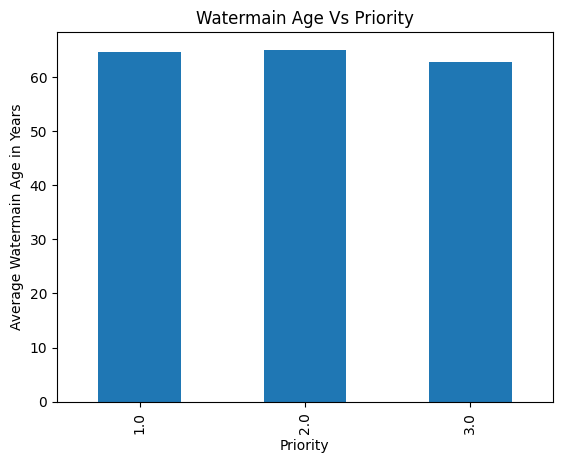

In [22]:
#Needed to groupby prio then take the pipe_life mean then plotted. 
df_dropped.groupby('Priority')['Pipe_Life'].mean().plot(kind = 'bar',
                            title="Watermain Age Vs Priority", ylabel="Average Watermain Age in Years")

In [23]:
#needed to see how many were in each priority level to make sure it holds value
df_dropped.groupby('Priority').size()

Priority
1.0    467
2.0      1
3.0     17
dtype: int64

## Analysis for pipe_life and priority graph
The graph above shows that there is not a direct correlation between a pipe's life and the priority of the break when it does happen. The averages of the first break for a watermain are about the same for each priority level, so there is not a significant enough difference for it to be of importance. Therefore the age of the watermain does not play a role in the severity of the watermain break. 

## Code for frequency of breaks based on pipe life

In [24]:
#Using the df_dropped dataframe again because the life span of the pipe could be different then the finished job
#resetting index so its easier to use index if needed
df_dropped.reset_index(drop=True, inplace=True)

In [28]:
#Create bins that contain the pipe life for every 10 years
max_pipe_life = int(df_dropped['Pipe_Life'].max())

# Create bins for every 10 years
bins = list(range(0, max_pipe_life + 11, 10))

# Create labels for the bins
labels = [f"{x}-{x+9}" for x in range(0, max_pipe_life + 1, 10)]

# Use pd.cut() to create a new column with the bins
df_dropped['Pipe_Life_Bins'] = pd.cut(df_dropped['Pipe_Life'], bins=bins, labels=labels, right=False)

## Graph of Watermain Breaks by Pipe Life Bins

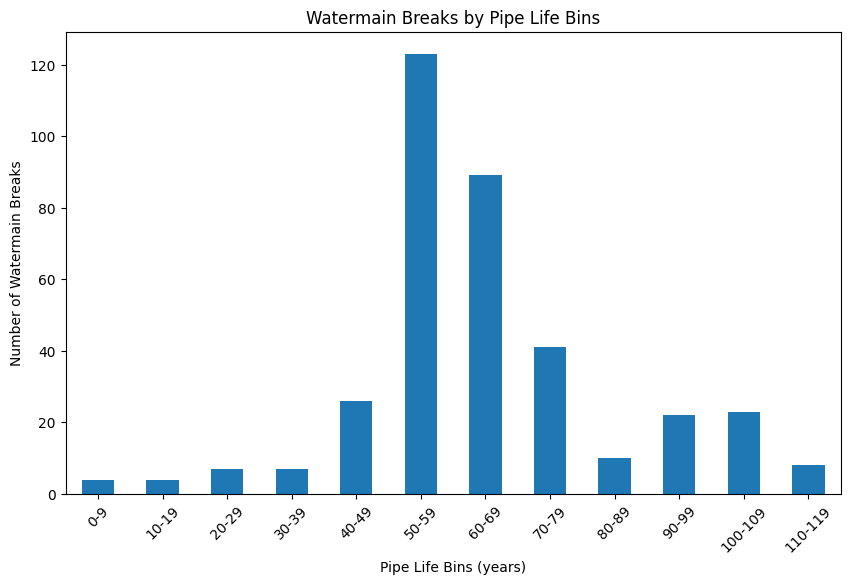

In [29]:
# You can group the data by 'Pipe_Life_Bins' and calculate the sum of 'work order ids' in each bin 
breaks_by_life = df_dropped.groupby('Pipe_Life_Bins')['Work Order ID'].nunique()

# Create a bar plot to visualize the relationship
breaks_by_life.plot(kind='bar', figsize=(10, 6))
plt.title('Watermain Breaks by Pipe Life Bins')
plt.xlabel('Pipe Life Bins (years)')
plt.ylabel('Number of Watermain Breaks')
plt.xticks(rotation=45)
plt.show()

## Anaylsis of Watermain Breaks by Pipe Life Bins

From the graph above we can see that the pipes tend to break in the 50-80 year period. This shows that the frequency of breaks happen in that age range. However, the watermain breaks do not continue to increase in frequency as the age of them gets older. We can see that after the period of 50-80 years the watermain breaks goes back down to only 10-20 from 80-140 years old. There could be a few other factors that potentially impact these results such as material type of the pipe and the soil it is surronded by. As I continue with my analysis my second research question will take the material the watermain is made with into consideration and I will be able to narrow down these results.

In [30]:
# Create the new column 'Pipe_Life' that represents how long the pipe went without breaking
clean_df['Pipe_Life'] = clean_df['Actual Start'].dt.year - clean_df['INSTALLDAT'].dt.year


In [31]:
#using 2024 as the current year because it will give more accurate results due to the pipe being closer to that age
# Fill null values in 'Pipe_Life' with the calculated age as of 2024
clean_df['Pipe_Life'].fillna(2024 - clean_df['INSTALLDAT'].dt.year, inplace=True)


In [32]:
clean_df['Actual Start'].isna().sum()

373

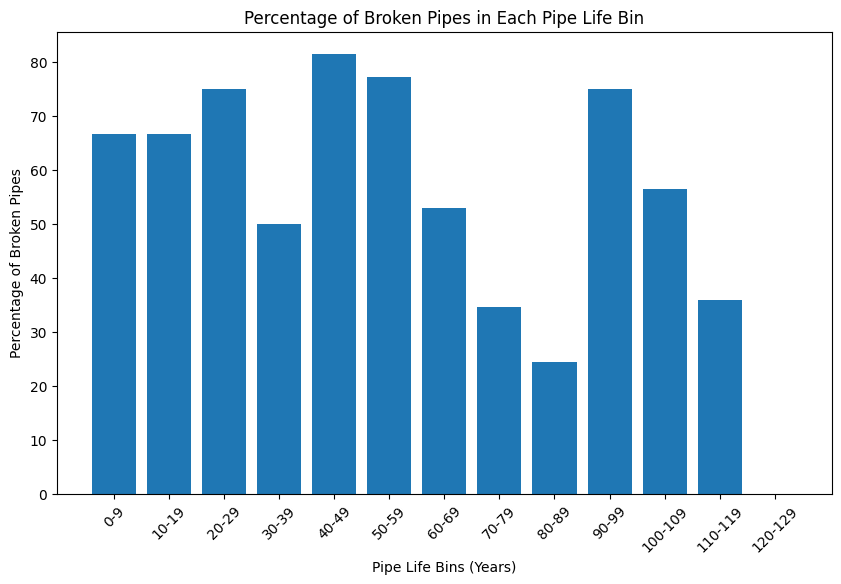

In [33]:
# Create age bins
max_pipe_life = int(clean_df['Pipe_Life'].max())
bins = list(range(0, max_pipe_life + 11, 10))
labels = [f"{x}-{x+9}" for x in range(0, max_pipe_life + 1, 10)]

# Filter rows where 'Actual Start' is not null
broken_df = clean_df.dropna(subset=['Actual Start'])

# Group broken_df by age bins and calculate the count of broken pipes in each bin
broken_df_counts = broken_df.groupby(pd.cut(broken_df['Pipe_Life'], bins=bins, labels=labels, right=False)).size()

# Group clean_df by age bins and calculate the total count in each bin
clean_df_counts = clean_df.groupby(pd.cut(clean_df['Pipe_Life'], bins=bins, labels=labels, right=False)).size()


# Calculate the percentage of broken pipes in each age bin
percentage_broken = (broken_df_counts / clean_df_counts) * 100

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(labels, percentage_broken)
plt.xlabel('Pipe Life Bins (Years)')
plt.ylabel('Percentage of Broken Pipes')
plt.title('Percentage of Broken Pipes in Each Pipe Life Bin')
plt.xticks(rotation=45)
plt.show()

In [34]:
clean_df_counts

Pipe_Life
0-9          6
10-19        6
20-29       12
30-39       16
40-49       38
50-59      193
60-69      221
70-79      144
80-89       41
90-99       48
100-109     46
110-119     25
120-129      7
dtype: int64

In [35]:
# Calculate the average percentage for ages between 50 and 79
average_percentage_50_to_79 = percentage_broken.loc['50-59':'70-79'].mean()
average_percentage_50_to_79

54.955157077223525